['']


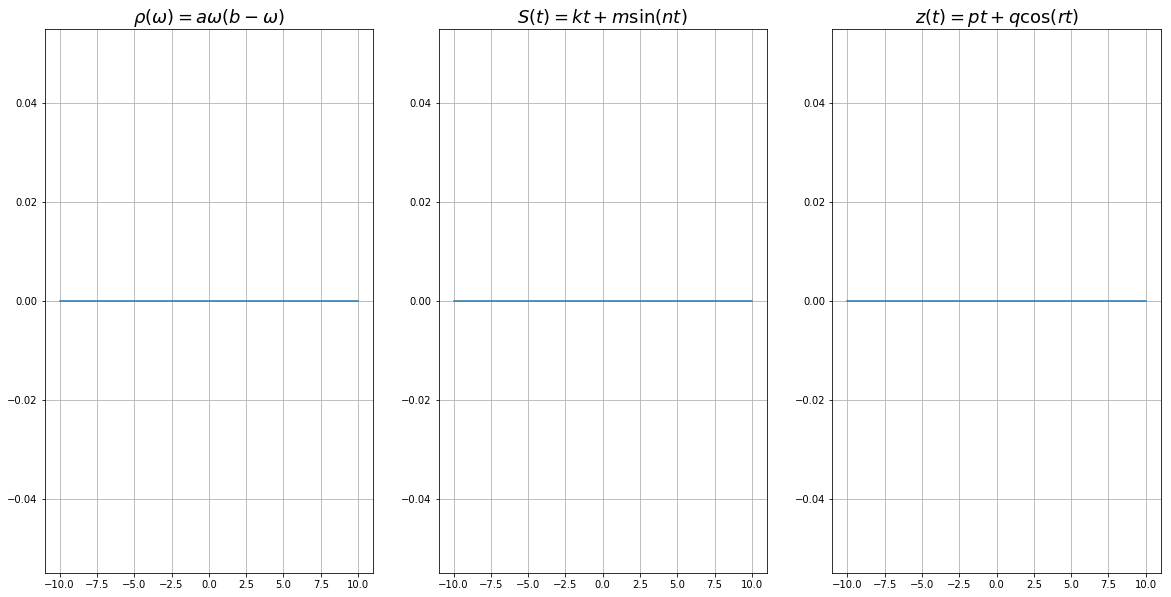

In [4]:
import sys  # sys нужен для передачи argv в QApplication
import os
import numpy as np
from os.path import expanduser
from PyQt5 import QtWidgets, QtCore
import design
import design_p
import matplotlib.pyplot as plt

class Param(QtWidgets.QDialog, design_p.Ui_Dialog):
    def __init__(self):
        # Это здесь нужно для доступа к переменным, методам
        # и т.д. в файле design.py
        super().__init__()
        self.setupUi(self)  # Это нужно для инициализации нашего дизайна

class Main(QtWidgets.QMainWindow, design.Ui_MainWindow):
    def __init__(self):
        # Это здесь нужно для доступа к переменным, методам
        # и т.д. в файле design.py
        super().__init__()
        self.files = []
        self.Param = None
        self.setupUi(self)  # Это нужно для инициализации нашего дизайна
        self.setup_signals()
        self.rho_a = 0
        self.rho_b = 0
        self.s_k = 0
        self.s_m = 0
        self.s_n = 0
        self.z_p = 0
        self.z_q = 0
        self.z_r = 0

    def setup_signals(self):
        # Connect button to openSisterWin
        self.pushButton_rho_g.clicked.connect(self.browse_folder)
        self.pushButton_s_g.clicked.connect(self.browse_folder)
        self.pushButton_z_g.clicked.connect(self.browse_folder)
        self.pushButton_rho_p.clicked.connect(self.on_Button_clicked)
        self.pushButton_s_p.clicked.connect(self.on_Button_clicked)
        self.pushButton_z_p.clicked.connect(self.on_Button_clicked)

    def on_Button_clicked(self, checked=None):
        if checked == None: return
        dialog = QtWidgets.QDialog()
        dialog.ui = Param()
        dialog.ui.setupUi(dialog)
        # dialog.setAttribute(QtCore.Qt.WA_DeleteOnClose)
        dialog.exec_()
        self.rho_a = dialog.ui.doubleSpinBox_rho_a.value()
        # print(self.rho_a)
        self.rho_b = dialog.ui.doubleSpinBox_rho_b.value()
        self.s_k = dialog.ui.doubleSpinBox_s_k.value()
        self.s_m = dialog.ui.doubleSpinBox_s_m.value()
        self.s_n = dialog.ui.doubleSpinBox_s_n.value()
        self.z_p = dialog.ui.doubleSpinBox_z_p.value()
        self.z_q = dialog.ui.doubleSpinBox_z_q.value()
        self.z_r = dialog.ui.doubleSpinBox_z_r.value()


    def openSisterWin(self):
        if not self:
            self.Param = Param()
        if self.Param.isVisible():
            print('Hiding')
            self.Param.hide()
            # hide or close, it's your choice
            # self.sisterWin.close()
        else:
            print('Showing')
            self.Param.show()

    def browse_folder(self):
        home = expanduser("~")
        directory = QtWidgets.QFileDialog.getOpenFileName(self, directory=home, filter="Array files (*.csv)")
        self.files.append(directory[0])


def main():
    app = QtWidgets.QApplication(sys.argv)  # Новый экземпляр QApplication
    window = Main()  # Создаём объект класса ExampleApp
    window.show()  # Показываем окно
    app.exec_()  # и запускаем приложение
    a, b, k, m, n, p, q, r, files = window.rho_a, window.rho_b, window.s_k, window.s_m, window.s_n, window.z_p, window.z_q, window.z_r, window.files
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
    sp = np.linspace(-10, 10, 100)
    rho = a * sp * (b - sp)
    s = k * sp + m * np.sin(n*sp)
    z = p * sp + q * np.cos(r*sp)
#     print(a, b, k, m, n, p, q, r, sep=' ')
#     print(rho, s, z)
    ax1.set_title(r'$\rho(\omega) = a \omega (b - \omega)$', fontsize=18)
    ax2.set_title(r'$S(t) = kt + m \sin (nt)$', fontsize=18)
    ax3.set_title(r'$z(t) = pt + q \cos (rt)$', fontsize=18)
    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax1.plot(sp, rho)
    ax2.plot(sp, s)
    ax3.plot(sp, z)
    print(window.files)
    

if __name__ == '__main__':  # Если мы запускаем файл напрямую, а не импортируем
    main()  # то запускаем функцию main()


In [ ]:
import sys  # sys нужен для передачи argv в QApplication
import os
import numpy as np
from os.path import expanduser
from PyQt5 import QtWidgets, QtCore
import design, design_p, design_c
import matplotlib.pyplot as plt
import pandas as pd

class Param(QtWidgets.QDialog, design_p.Ui_Dialog):
    def __init__(self):
        # Это здесь нужно для доступа к переменным, методам
        # и т.д. в файле design.py
        super().__init__()
        self.setupUi(self)  # Это нужно для инициализации нашего дизайна
        self.buttonBox.accepted.connect(self.accept)
        self.buttonBox.rejected.connect(self.reject)

class Couchy(QtWidgets.QDialog, design_c.Ui_Dialog):
    def __init__(self):
        # Это здесь нужно для доступа к переменным, методам
        # и т.д. в файле design.py
        super().__init__()
        self.setupUi(self)  # Это нужно для инициализации нашего дизайна
        self.buttonBox.accepted.connect(self.accept)
        self.buttonBox.rejected.connect(self.reject)


class Main(QtWidgets.QMainWindow, design.Ui_MainWindow):
    def __init__(self):
        # Это здесь нужно для доступа к переменным, методам
        # и т.д. в файле design.py
        super().__init__()
        self.Param = None
        self.setupUi(self)  # Это нужно для инициализации нашего дизайна
        self.rho_a = 0
        self.rho_b = 0
        self.s_k = 0
        self.s_m = 0
        self.s_n = 0
        self.z_p = 0
        self.z_q = 0
        self.z_r = 0
        self.x0 = 0
        self.y0 = 0
        self.t = 0
        self.beta = 0
        self.rho_grid = None
        self.s_grid = None
        self.z_grid = None
        self.setup_signals()

    def setup_signals(self):
        # Connect button to openSisterWin
        self.pushButton_rho_g.clicked.connect(lambda: self.browse_folder("rho"))
        self.pushButton_s_g.clicked.connect(lambda: self.browse_folder("s"))
        self.pushButton_z_g.clicked.connect(lambda: self.browse_folder("z"))
        self.pushButton_p.clicked.connect(self.params)
        # self.pushButton_s_p.clicked.connect(self.params)
        # self.pushButton_z_p.clicked.connect(self.params)
        self.pushButton_cauchy.clicked.connect(self.couchy)

    def params(self, checked=None):
        if checked is None: return
        # dialog = QtWidgets.QDialog()
        # dialog.ui = Param()
        # dialog.ui.setupUi(dialog)

        dialog = Param()
        # dialog.setAttribute(QtCore.Qt.WA_DeleteOnClose)
        result = dialog.exec_()
        if result:
            self.rho_a = dialog.doubleSpinBox_rho_a.value()
            self.rho_b = dialog.doubleSpinBox_rho_b.value()
            self.s_k = dialog.doubleSpinBox_s_k.value()
            self.s_m = dialog.doubleSpinBox_s_m.value()
            self.s_n = dialog.doubleSpinBox_s_n.value()
            self.z_p = dialog.doubleSpinBox_z_p.value()
            self.z_q = dialog.doubleSpinBox_z_q.value()
            self.z_r = dialog.doubleSpinBox_z_r.value()
            self.plots()

    def couchy(self, checked=None):
        if checked is None:
            return
        dialog = Couchy()
        result = dialog.exec_()
        if result:
            self.x0 = dialog.doubleSpinBox_x0.value()
            self.y0 = dialog.doubleSpinBox_y0.value()
            self.t = dialog.doubleSpinBox_t.value()
            self.beta = dialog.doubleSpinBox_beta.value()

    def browse_folder(self, button):
        home = expanduser("~")
        directory = QtWidgets.QFileDialog.getOpenFileName(self, directory=home, filter="Array files (*.csv)")
        # print(type(button))
        if directory[0] == '':
            return
        if button == "rho":
            self.rho_grid = directory[0]
            self.grid_handler(self.rho_grid, "rho")
            # print(directory[0])
        if button == "s":
            self.s_grid = directory[0]
            self.grid_handler(self.s_grid, "s")
            # print(directory[0])
        if button == "z":
            self.z_grid = directory[0]
            self.grid_handler(self.z_grid, "z")
            # print(directory[0])
        # self.files.append(directory[0])

    def plots(self):
        a, b, k, m, n, p, q, r, files = self.rho_a, self.rho_b, self.s_k,\
                                        self.s_m, self.s_n, self.z_p, self.z_q,\
                                        self.z_r, self.files
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
        sp = np.linspace(-10, 10, 100)
        rho = a * sp * (b - sp)
        s = k * sp + m * np.sin(n * sp)
        z = p * sp + q * np.cos(r * sp)
        #     print(a, b, k, m, n, p, q, r, sep=' ')
        #     print(rho, s, z)
        ax1.set_title(r'$\rho(\omega) = a \omega (b - \omega)$', fontsize=18)
        ax2.set_title(r'$S(t) = kt + m \sin (nt)$', fontsize=18)
        ax3.set_title(r'$z(t) = pt + q \cos (rt)$', fontsize=18)
        ax1.grid()
        ax2.grid()
        ax3.grid()
        ax1.plot(sp, rho)
        ax2.plot(sp, s)
        ax3.plot(sp, z)
        plt.show()
        print(self.rho_grid, self.s_grid, self.z_grid)

    def grid_handler(self, dir, info="Smth"):
        df = pd.read_csv(dir, header=None, index_col=0)
        grid = df.values
        if grid.shape[0] == 2:
            if info == "rho":
                # plt.title(r'$\rho(\omega)$', fontsize=18)
                plt.xlabel(r'\omega', fontsize=15)
                plt.ylabel(r'$\rho(\omega)$', fontsize=15)
                plt.plot(grid[0], grid[1])
                plt.show()
            elif info == "s":
                # plt.title(r'$S(t)$', fontsize=18)
                plt.xlabel(r'$t$', fontsize=15)
                plt.ylabel(r'$S(t)$', fontsize=15)
                plt.plot(grid[0], grid[1])
                plt.show()
            elif info == "z":
                plt.xlabel(r'$t$', fontsize=15)
                plt.ylabel(r'$z(t)$', fontsize=15)
                plt.plot(grid[0], grid[1])
                plt.show()
    

def main():
    app = QtWidgets.QApplication(sys.argv)  # Новый экземпляр QApplication
    window = Main()  # Создаём объект класса ExampleApp
    window.show()  # Показываем окно
    app.exec_()  # и запускаем приложение


if __name__ == '__main__':  # Если мы запускаем файл напрямую, а не импортируем
    main()  # то запускаем функцию main()
